# [DACON] 신용카드 사용자 연체 예측 AI 경진대회
---

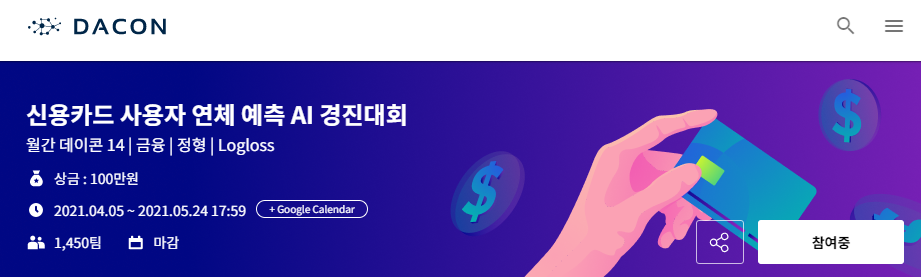

# 주제
---
- 신용카드 사용자 데이터를 보고 사용자의 대금 연체 정도를 예측하는 알고리즘 개발 

# 배경
---
- 신용카드사는 신용카드 신청자가 제출한 개인정보와 데이터를 활용해 신용 점수를 산정. 신용카드사는 이 신용 점수를 활용해 신청자의 향후 채무 불이행과 신용카드 대급 연체 가능성을 예측.


- 현재 많은 금융업계는 인공지능(AI)를 활용한 금융 서비스를 구현. 사용자의 대금 연체 정도를 예측할 수 있는 인공지능 알고리즘을 개발해 금융업계에 제안할 수 있는 인사이트를 발굴.

# 대회 설명
---
- 신용카드 사용자들의 개인 신상정보 데이터로 사용자의 신용카드 대금 연체 정도를 예측

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
# 파이썬 시각화 패키지 불러오기 
import matplotlib.pyplot as plt 
%matplotlib inline 
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
# 사용자 운영체제 확인 
import platform 
platform.system() 

# 운영체제별 한글 폰트 설정 
if platform.system() == 'Darwin':
    # Mac 환경 폰트 설정 
    plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': 
    # Windows 환경 폰트 설정 
    plt.rc('font', family='Malgun Gothic') 
    
plt.rc('axes', unicode_minus=False)ㅁ # 마이너스 폰트 설정 

# 글씨 선명하게 출력하는 설정 
%config InlineBackend.figure_format = 'retina'


# Feature Description
---

데이터 변수 설명

index

gender: 성별

car: 차량 소유 여부

reality: 부동산 소유 여부

child_num: 자녀 수

income_total: 연간 소득

income_type: 소득 분류

                        ['Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student']
edu_type: 교육 수준

                        ['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']
family_type: 결혼 여부

                        ['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow']
house_type: 생활 방식

                        ['Municipal apartment', 'House / apartment', 'With parents',



                         'Co-op apartment', 'Rented apartment', 'Office apartment']
DAYS_BIRTH: 출생일

                        데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미
DAYS_EMPLOYED: 업무 시작일

                        데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미



                        양수 값은 고용되지 않은 상태를 의미함
FLAG_MOBIL: 핸드폰 소유 여부

work_phone: 업무용 전화 소유 여부

phone: 전화 소유 여부

email: 이메일 소유 여부

occyp_type: 직업 유형

family_size: 가족 규모

begin_month: 신용카드 발급 월

                        데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미
credit: 사용자의 신용카드 대금 연체를 기준의 신용도

                        => 낮을 수록 높은 신용의 신용카드 사용자를 의미함

-------

# EDA 목적
---

**해당 데이터는 신용도가 낮은 연체 고객을 예측하는 것이 목표, 따라서 시각화를 통해 데이터를 이해하고 연체 확률이 높은 고객층을 발굴하는 것이 이번 시각화의 목적입니다.**

In [2]:
# 데이터 로드

df = pd.read_csv('../data/open/train.csv')
df.head(3)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0


# 결측치 확인
---

In [651]:
# 결측치 확인

df.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

<AxesSubplot:>

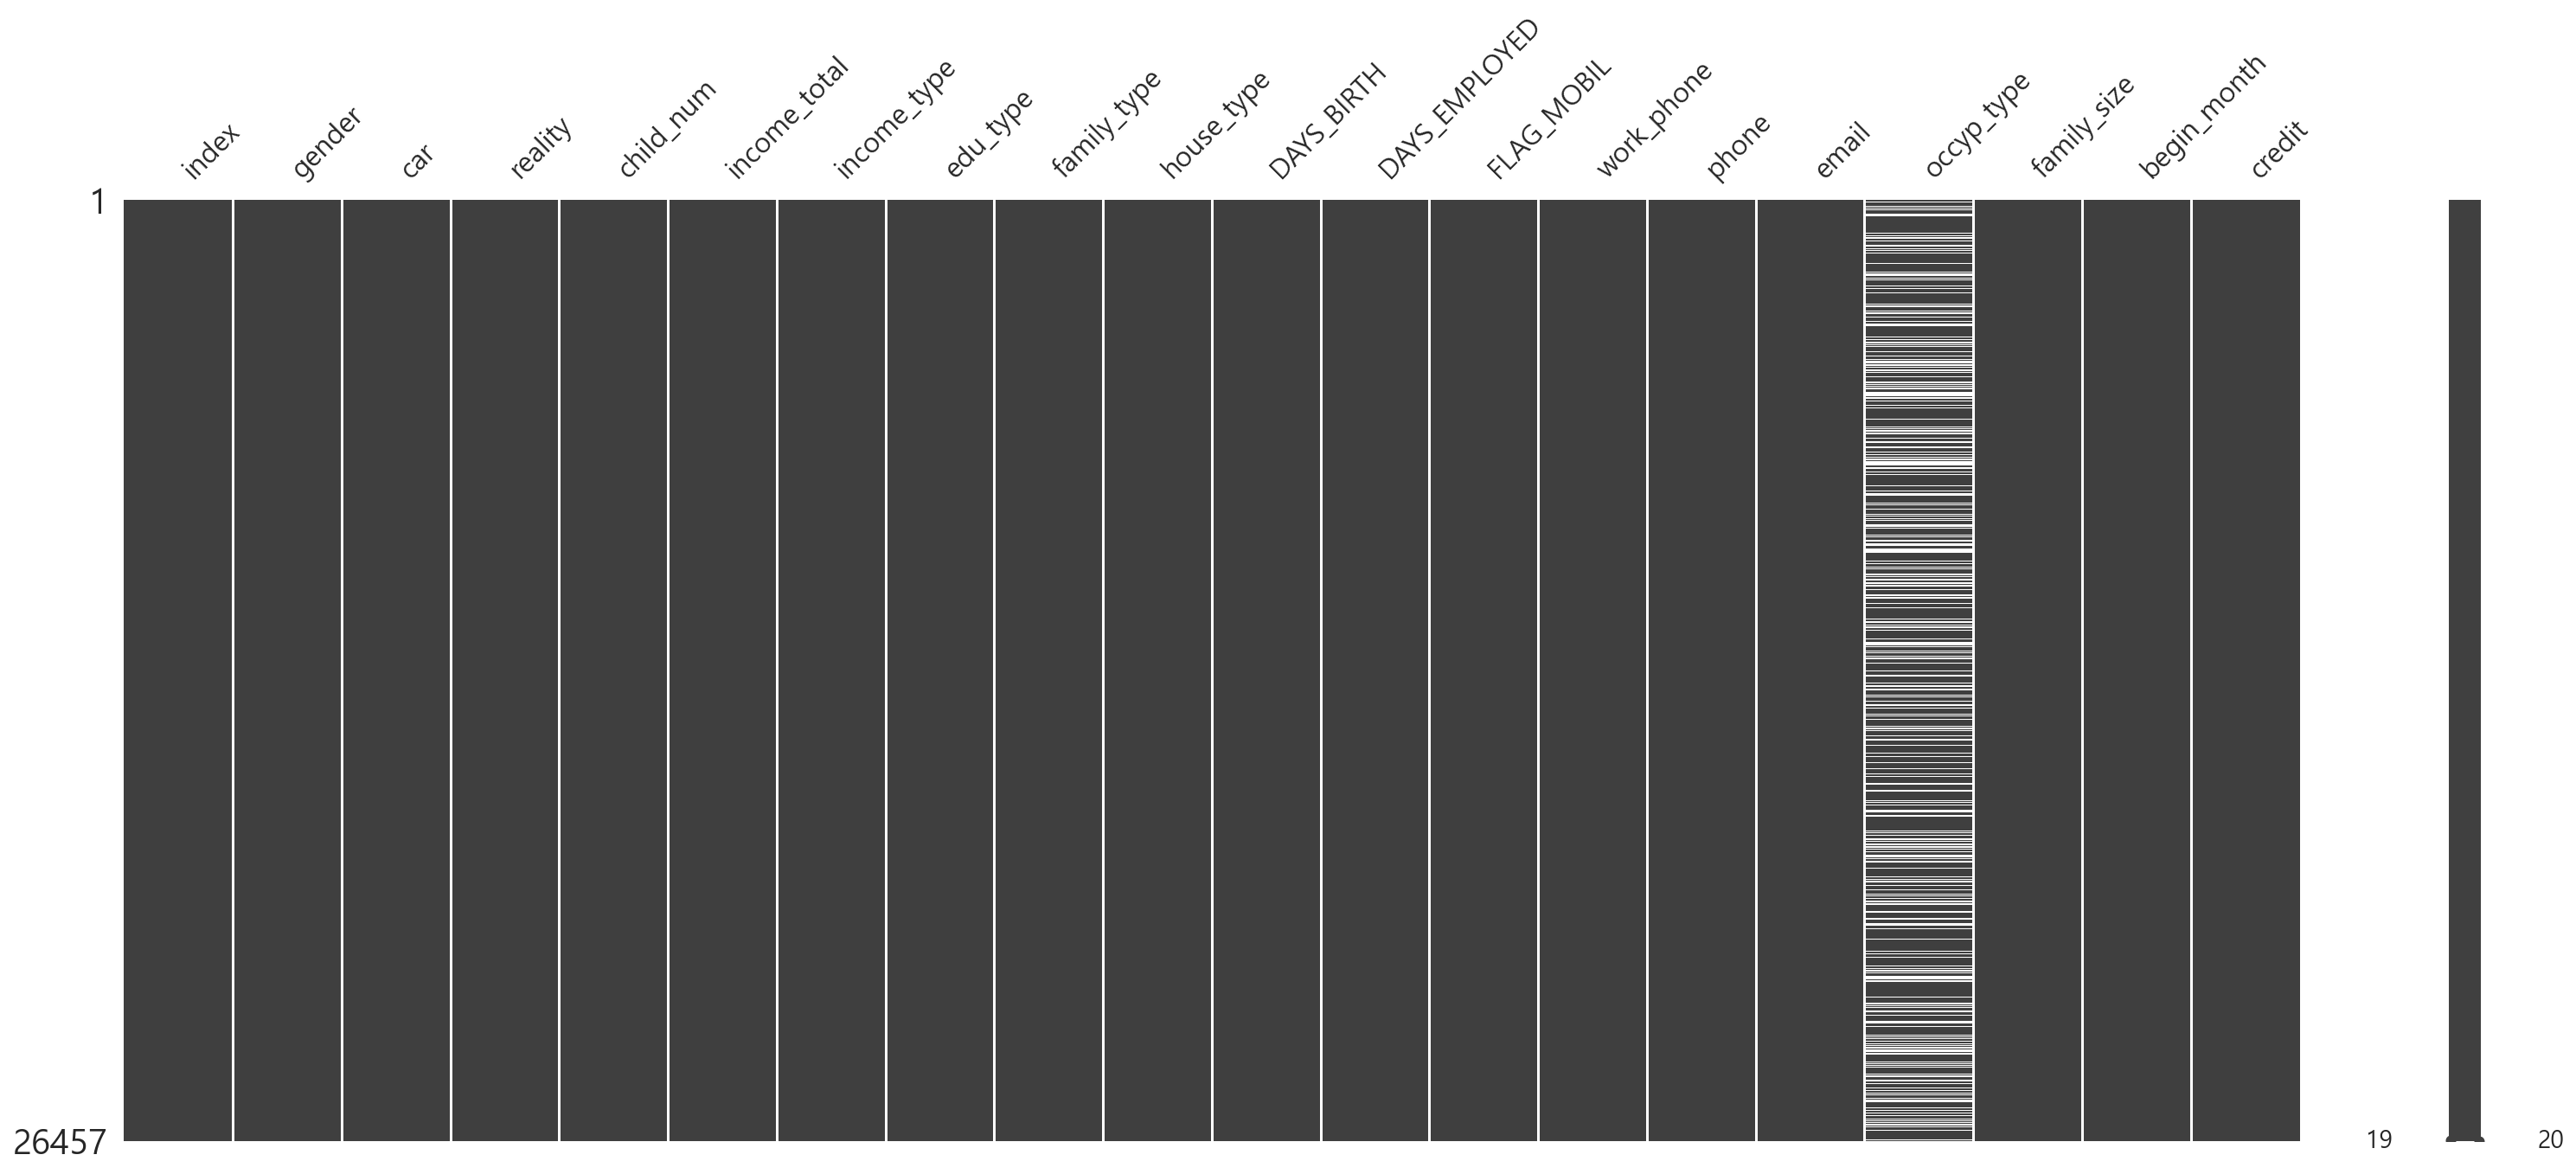

In [652]:
# 결측치 시각화

msno.matrix(df)

In [653]:
# 직업 관련 피처에 결측치가 상당 수 존재.

df.occyp_type.unique()

array([nan, 'Laborers', 'Managers', 'Sales staff',
       'High skill tech staff', 'Core staff', 'Drivers', 'Medicine staff',
       'Accountants', 'Realty agents', 'Security staff', 'Cleaning staff',
       'Private service staff', 'Cooking staff', 'Secretaries',
       'HR staff', 'IT staff', 'Low-skill Laborers',
       'Waiters/barmen staff'], dtype=object)

# 직업 피처 분포
---

<AxesSubplot:xlabel='count', ylabel='occyp_type'>

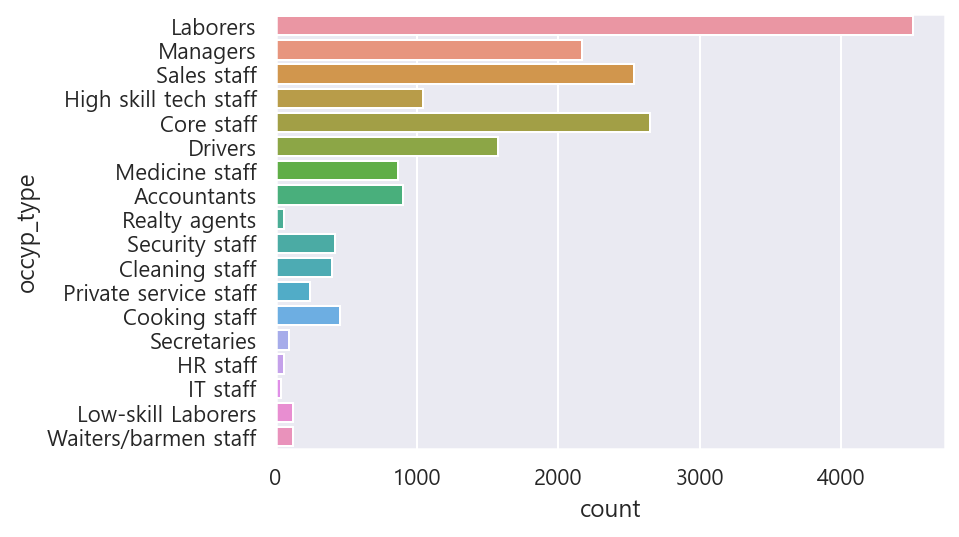

In [654]:
# 직업 피처 분포 시각화

sns.countplot(y=df.occyp_type)

- 현재로써 직업관련 피처는 상당히 다양하고 결측치를 채운다고 하더라도 유의미한 결과를 가져오지 못할 것으로 보여 피처를 제거하는 방향을 고려할 수 있습니다.


- 추가적으로 해당 결측치를 무직으로 처리하는 방법도 고려하여 ML 모델의 성능에 따른 결정이 필요합니다.

# 학력 분포
---

<AxesSubplot:xlabel='count', ylabel='edu_type'>

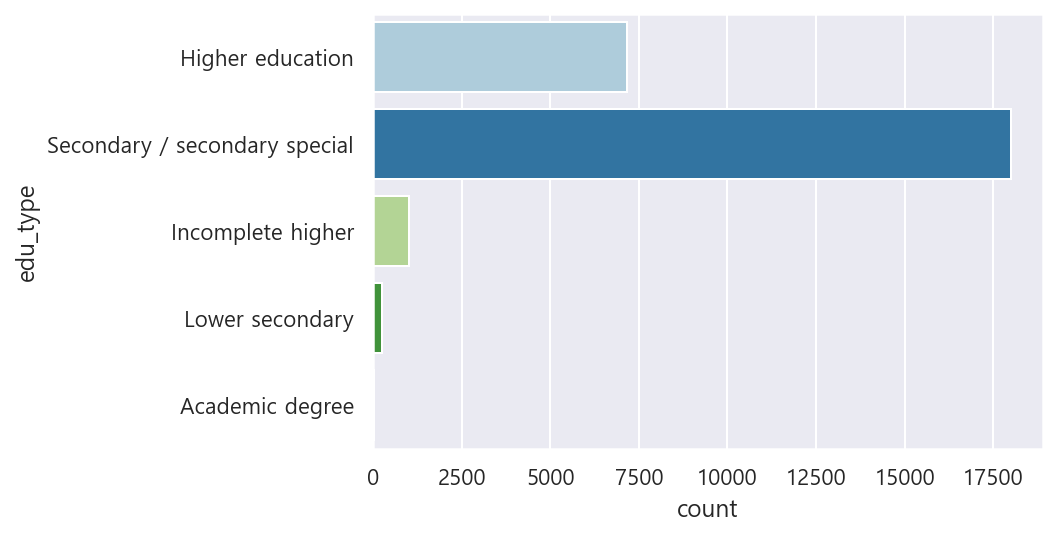

In [655]:
# 학력 분포 시각화

sns.countplot(y=df.edu_type)

In [656]:
df.edu_type.value_counts()

Secondary / secondary special    17995
Higher education                  7162
Incomplete higher                 1020
Lower secondary                    257
Academic degree                     23
Name: edu_type, dtype: int64

In [1003]:
# DAYS_BIRTH, DAYS_EMPLOYED, begin_month 피처는 역으로 count, 양수로 변경된 컬럼 추가

df['DAYS_BIRTH_clean'] = df['DAYS_BIRTH']*-1 
df['DAYS_EMPLOYED_clean'] = df['DAYS_EMPLOYED']*-1
df['begin_month_clean'] = df['begin_month']*-1

- DAYS_BIRTH, DAYS_EMPLOYED, begin_month 피처는 음수로 카운트 되었기에 양수로 변환한 컬럼을 추가로 생성합니다.

In [658]:
# income_total 피처 통계량 확인

df.income_total.describe()

count    2.645700e+04
mean     1.873065e+05
std      1.018784e+05
min      2.700000e+04
25%      1.215000e+05
50%      1.575000e+05
75%      2.250000e+05
max      1.575000e+06
Name: income_total, dtype: float64

# income_total 히스토그램
---

<AxesSubplot:xlabel='income_total', ylabel='Density'>

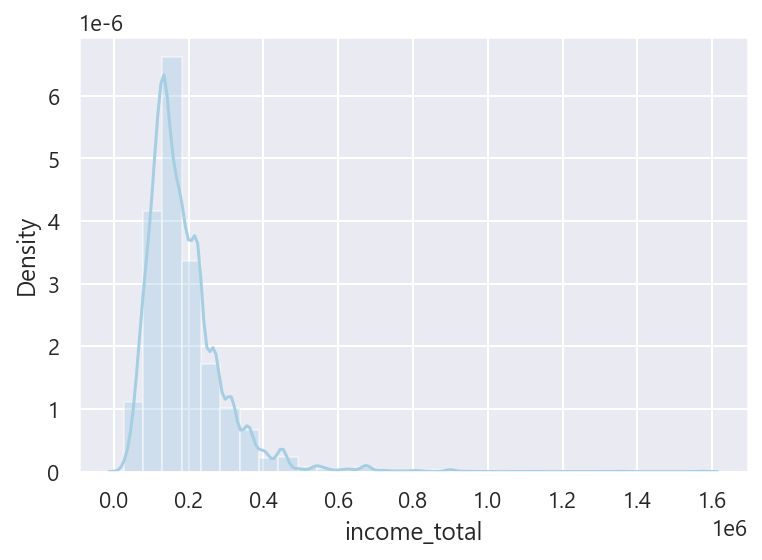

In [659]:
# income_total 히스토그램 시각화

sns.distplot(df.income_total, bins=30)

- total_income 피처의 데이터는 중앙에 몰려있는 모양이르 히스토그램이 그려지며 qcut을 이용해 데이터 균형을 맞추어 분할합니다.

In [660]:
# 소득 구간 피처 추가, 데이터 균형을 위해 qcut 사용

df['income_class'] = pd.qcut(df.income_total, 5, labels=np.arange(5))

In [661]:
df.income_class.value_counts()

0    6191
3    5389
2    5294
4    4856
1    4727
Name: income_class, dtype: int64

# Income_class 분포
---

<AxesSubplot:xlabel='count', ylabel='income_class'>

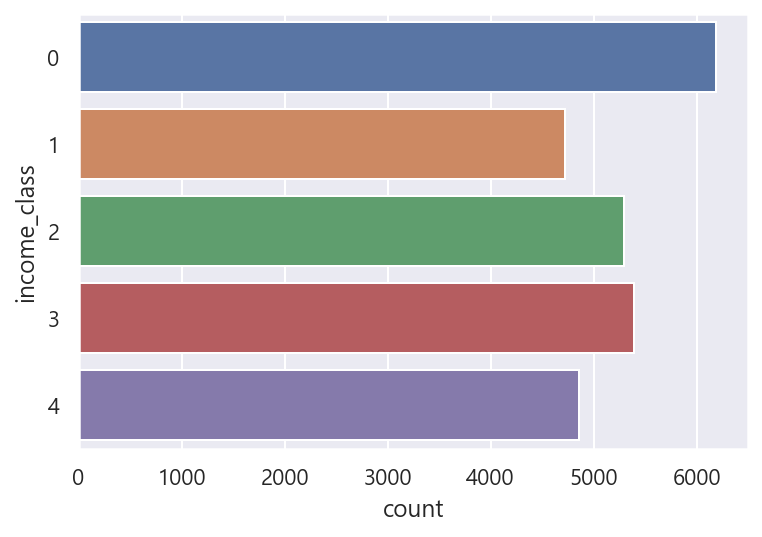

In [791]:
# income_class 분포 시각화

sns.countplot(y=df.income_class)

In [663]:
# 나이 피쳐 추가

df['age'] = (df['DAYS_BIRTH_clean'] / 365).astype(int)

- DAYS_BIRTH_clean 피처를 365일로 나누어 age 피처를 추가로 생성합니다.

# 연령대 히스토그램
---

<AxesSubplot:title={'center':'연령대 히스토그램'}, xlabel='age', ylabel='Density'>

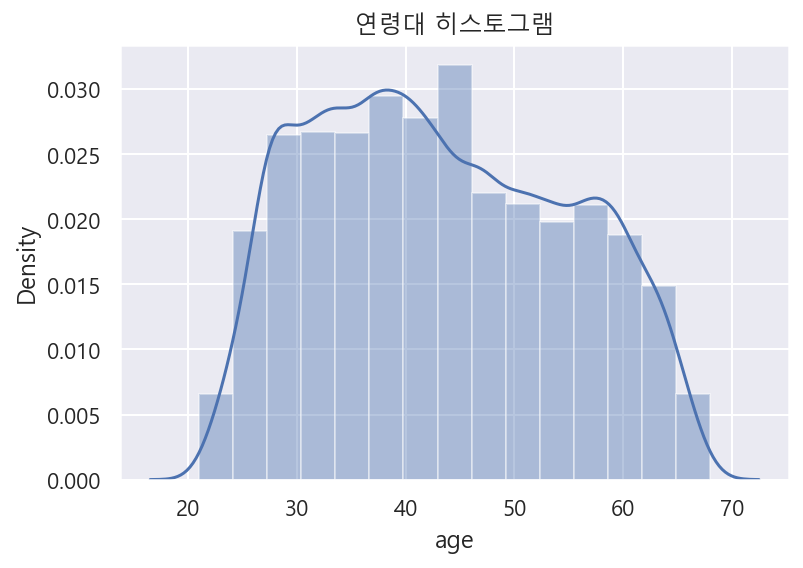

In [790]:
# 히스토그램을 통한 연령대 확인히스토그램을 통한 연령대 확인

plt.title("연령대 히스토그램")
sns.distplot(df.age, bins=15)

- 새롭게 추가된 연령 피처의 분포를 확인한 결과 비교적 완만한 히스토그램이 기려지며 살짝 30대에서 40대에 쏠린 것을 확인할 수 있습니다.

In [665]:
# 연령대와 성별에 따른 신용등급 분포
# 여성 0, 남성 1

# 신용도에 따른 소득수준 분포
---

<AxesSubplot:title={'center':'credit_2'}, xlabel='income_total', ylabel='Density'>

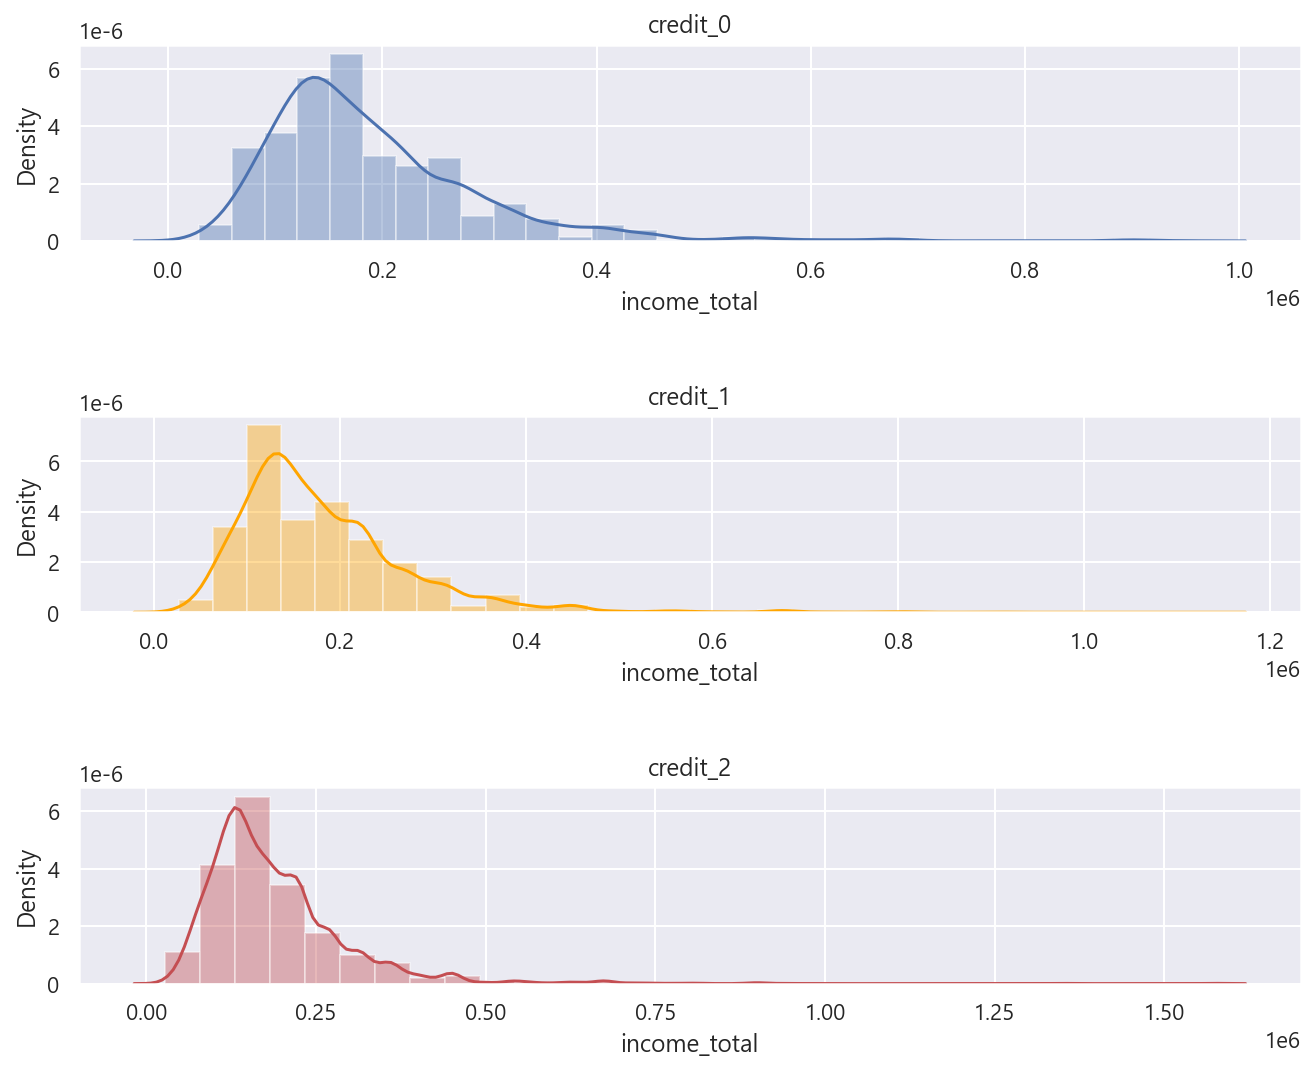

In [666]:
# 신용도 범주에 따른 소득수준 분포 시각화

credit_0 = df.loc[df['credit'] == 0]
credit_1 = df.loc[df['credit'] == 1]
credit_2 = df.loc[df['credit'] == 2]


plt.figure(figsize=(10, 8))

plt.subplot(311)
plt.tight_layout(pad=3.5)
plt.title('credit_0')
sns.distplot(credit_0.income_total, color='b', bins=30)

plt.subplot(312)
plt.tight_layout(pad=3.5)
plt.title('credit_1')
sns.distplot(credit_1.income_total, color='orange', bins=30)

plt.subplot(313)
plt.tight_layout(pad=3.5)
plt.title('credit_2')
sns.distplot(credit_2.income_total, color='r', bins=30)

- 신용도에 따라 소득 수준이 어떠한 분포를 가지고 있는지 확인하고 두 피처 간의 상관관계를 파악하기 위해 히스토그램을 그린 결과 신용도가 높을수록 소득수준이 상대적으로 높게 분포하는 것을 확인할 수 있습니다.


- 따라서 소득 수준과 신용도는 상관관계를 가지고 있다고 판단할 수 있습니다.

# credit 범주에 따른 데이터 분포 확인
----

In [667]:
df.credit.value_counts()

2.0    16968
1.0     6267
0.0     3222
Name: credit, dtype: int64

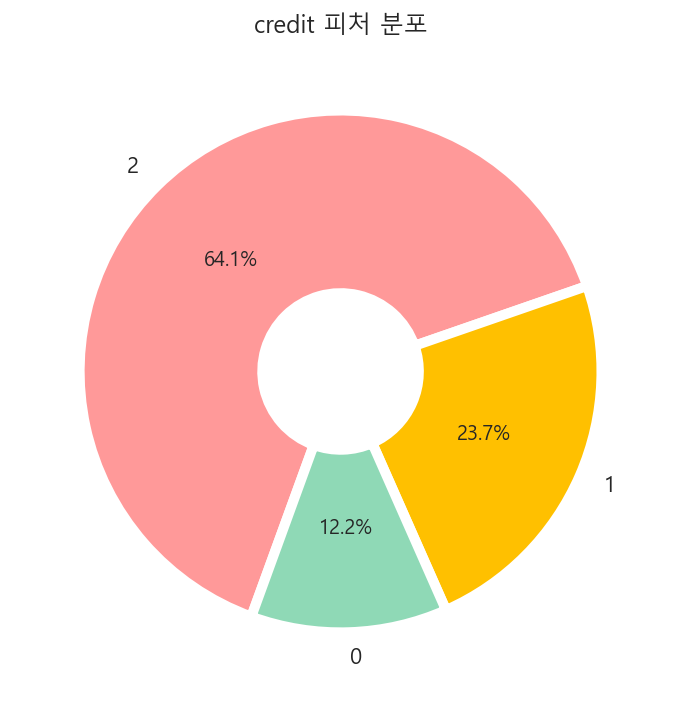

In [668]:
ratio = df.credit.value_counts()
labels = [2, 1, 0]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']

wedgeprops = {'width':0.7, 'edgecolor':'w', 'linewidth':5}

plt.figure(figsize=(6, 6))
plt.title('credit 피처 분포')
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=250, counterclock=False,
       colors=colors, wedgeprops=wedgeprops)
plt.show()

- credit 피처의 분포를 살펴본 결과 가장 낮은 2에 64.1%가 분포한 것을 확인할 수 있습니다. 추가적으로 신용 등급이 높을 수록 분포가 작아지는 것을 확인할 수 있습니다.

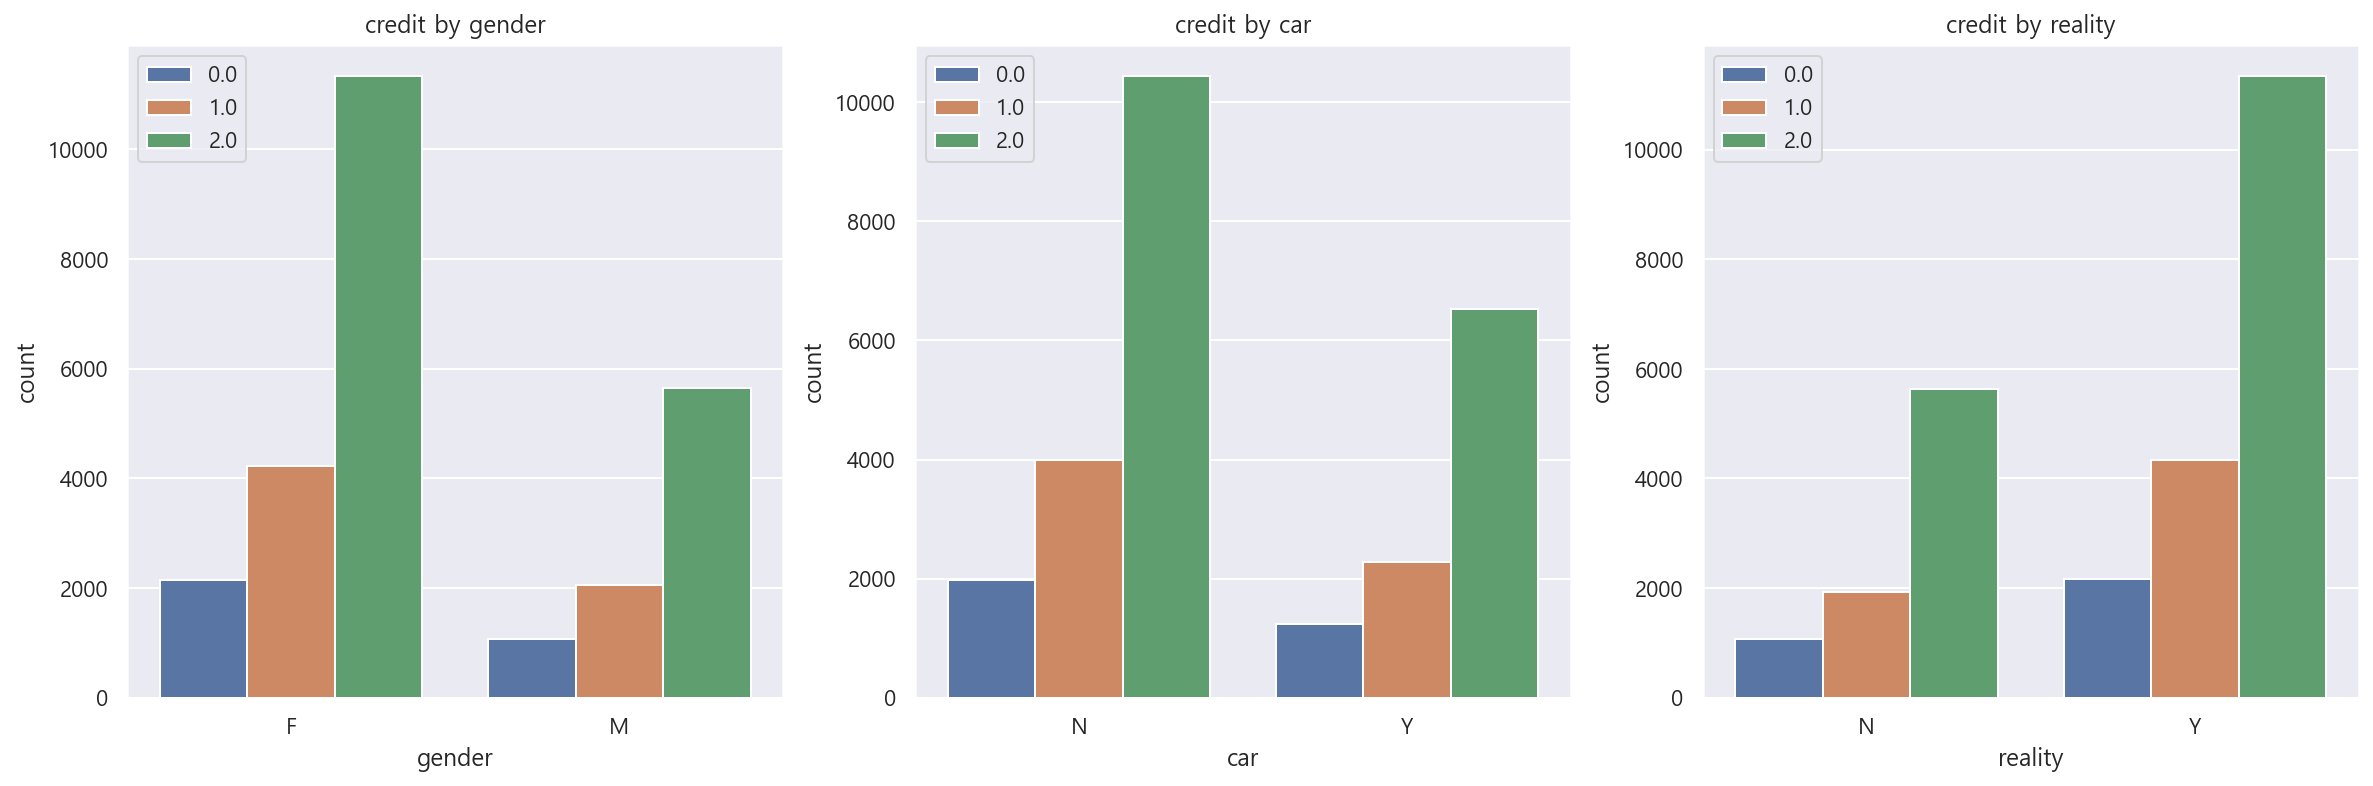

In [672]:
plt.figure(figsize=(20,6))

plt.subplot(131)
plt.title('credit by gender')
sns.countplot(data=df, x='gender', hue='credit')
plt.legend(loc=2)

plt.subplot(132)
plt.title('credit by car')
sns.countplot(data=df, x='car', hue='credit')
plt.legend(loc=2)

plt.subplot(133)
plt.title('credit by reality')
sns.countplot(data=df, x='reality', hue='credit')
plt.legend(loc=2)

- 성별에 따른 credit 범주 분포 시각화 결과 여성의 경우 신용 등급이 낮은 경우가 압도적으로 많았음을 확인할 수 있습니다.


- 추가적으로 차량, 부동산 소유 여부에 따른 credit 분포에서 독특한 점은 차량 소유 여부의 경우 차량을 소유하지 않은 그룹에서 신용등급이 2에 해당하는 인원이 상당히 많음을 확인할 수 있는 반면 부동산의 경우 오히려 부동산을 소유한 그룹에서 신용등급이 낮은 인원이 많은 것을 확인할 수 있습니다.

# 신혼부부 여부
---

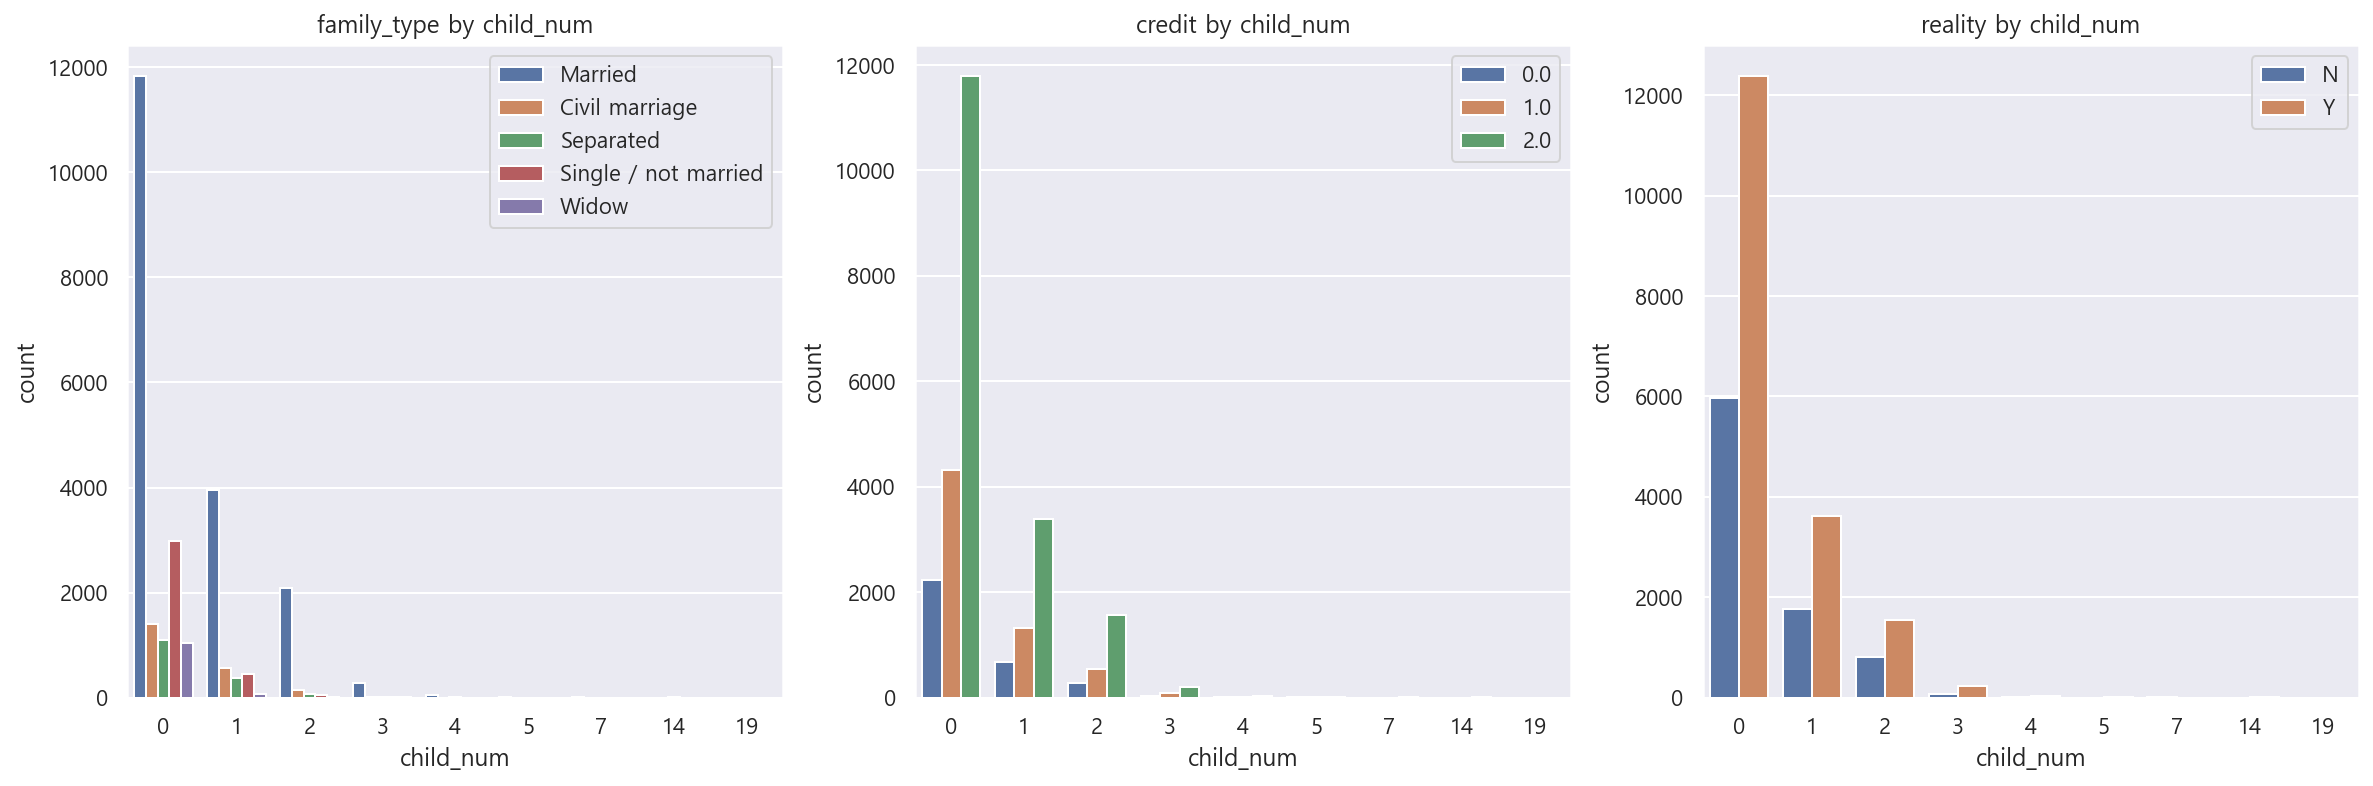

In [752]:
plt.figure(figsize=(20, 6))


plt.subplot(131)
plt.title('family_type by child_num')
sns.countplot(data=df, x='child_num', hue='family_type')
plt.legend(loc=1)

plt.subplot(132)
plt.title('credit by child_num')
sns.countplot(data=df, x='child_num', hue='credit')
plt.legend(loc=1)

plt.subplot(133)
plt.title('reality by child_num')
sns.countplot(data=df, x='child_num', hue='reality')
plt.legend(loc=1)

- 현재 데이터가 가장 많이 분포한 그룹은 자식이 없는 기혼자 그룹입니다. 또한 해당 그룹의 신용도가 낮은 고객이 가장 많은 것으로 보아 신혼부부 고객층이 해당 카드사에 많이 분포했음을 유추할 수 있습니다.


- 추가적으로 자식이 없는 그룹에서 신용 등급이 낮은 고객이 많았음에도 불구하고 부동산 소유자가 상당히 많이 분포한 것으로 보아 해당 그룹은 신혼집을 구하기 위해 무리한 대출을 받아 신용등급이 낮아진 것으로 가정했습니다.


- 즉, 신혼부부와 관련된 피처를 생성하면 신용등급이 낮은 그룹을 분류하는 중요한 피처로 사용할 수 있을 것으로 판단됩니다.

In [821]:
# 신혼부부 피쳐 추가 (기혼자이면서 아이가 없고 나이가 40대 미만인 그룸)

df['newly_married'] = np.where((df['family_type']=='Married') & (df['child_num']==0) & (df['age'] < 40), 'Yes' , 'No')

In [833]:
newly_married = df.loc[df['newly_married'] == 'Yes']

# 연령대와 성별에 따른 신용등급 분포
---

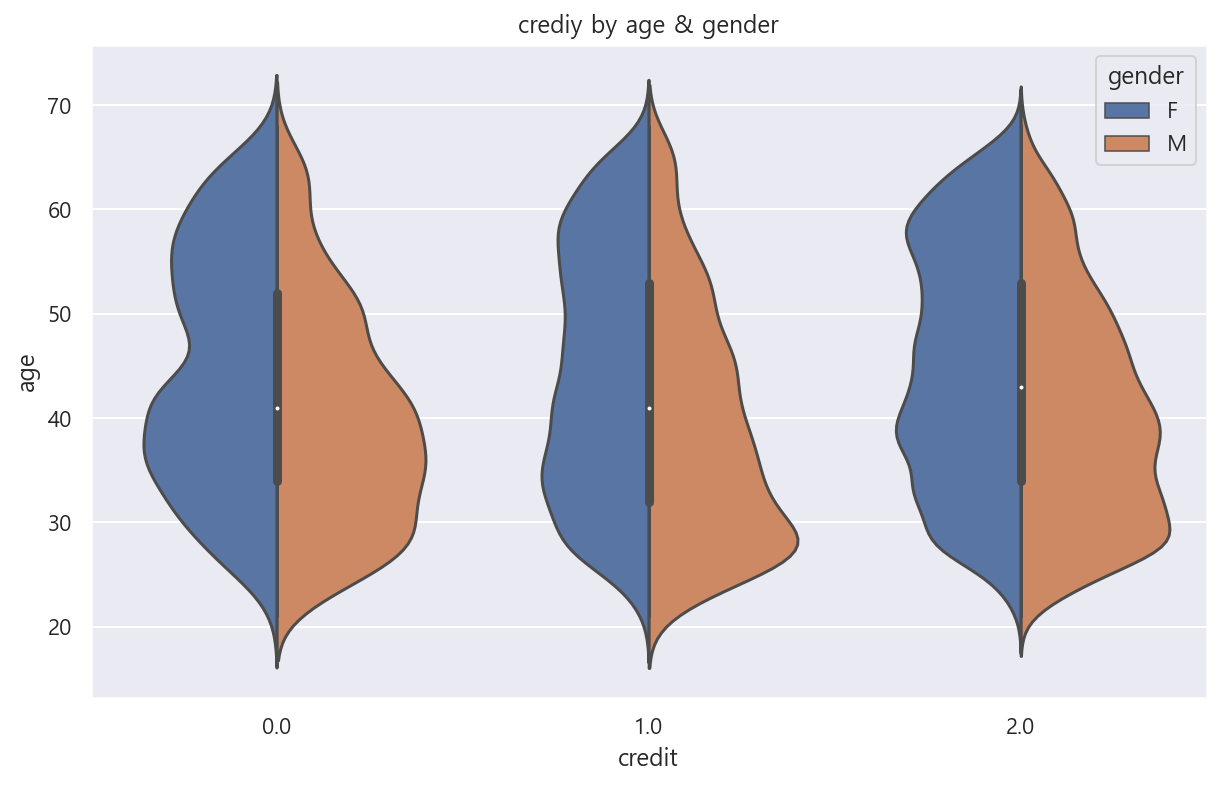

In [876]:
plt.figure(figsize=(10, 6))
plt.title('crediy by age & gender')
sns.violinplot(data=df, x='credit', y='age', hue='gender', split=True)
plt.show()

- 연령대와 성별에 따른 신용등급 분포를 확인한 결과 신용 등급이 가장 높은 0 범주에서 여성의 분포는 30~40대, 그리고 50대 중반의 연령대가 가장 많이 분포했다.

- 남성의 경우에는 20대 후반에서 40대의 고객이 신용등급이 가장 높은 것으로 확인된다.

- 신용등급이 가장 좋지 못한 연체가 우려되는 그룹은 여성의 경우 전체적으로 연령대가 고루 분포해 있으며 남성의 경우 20대 중반에서 30대 후반의 고객층이 주로 분포해 있음을 확인할 수 있다.

# 연령대와 성별에 따른 소득 구간
---

<AxesSubplot:title={'center':'income_class by age & gender'}, xlabel='age', ylabel='income_class'>

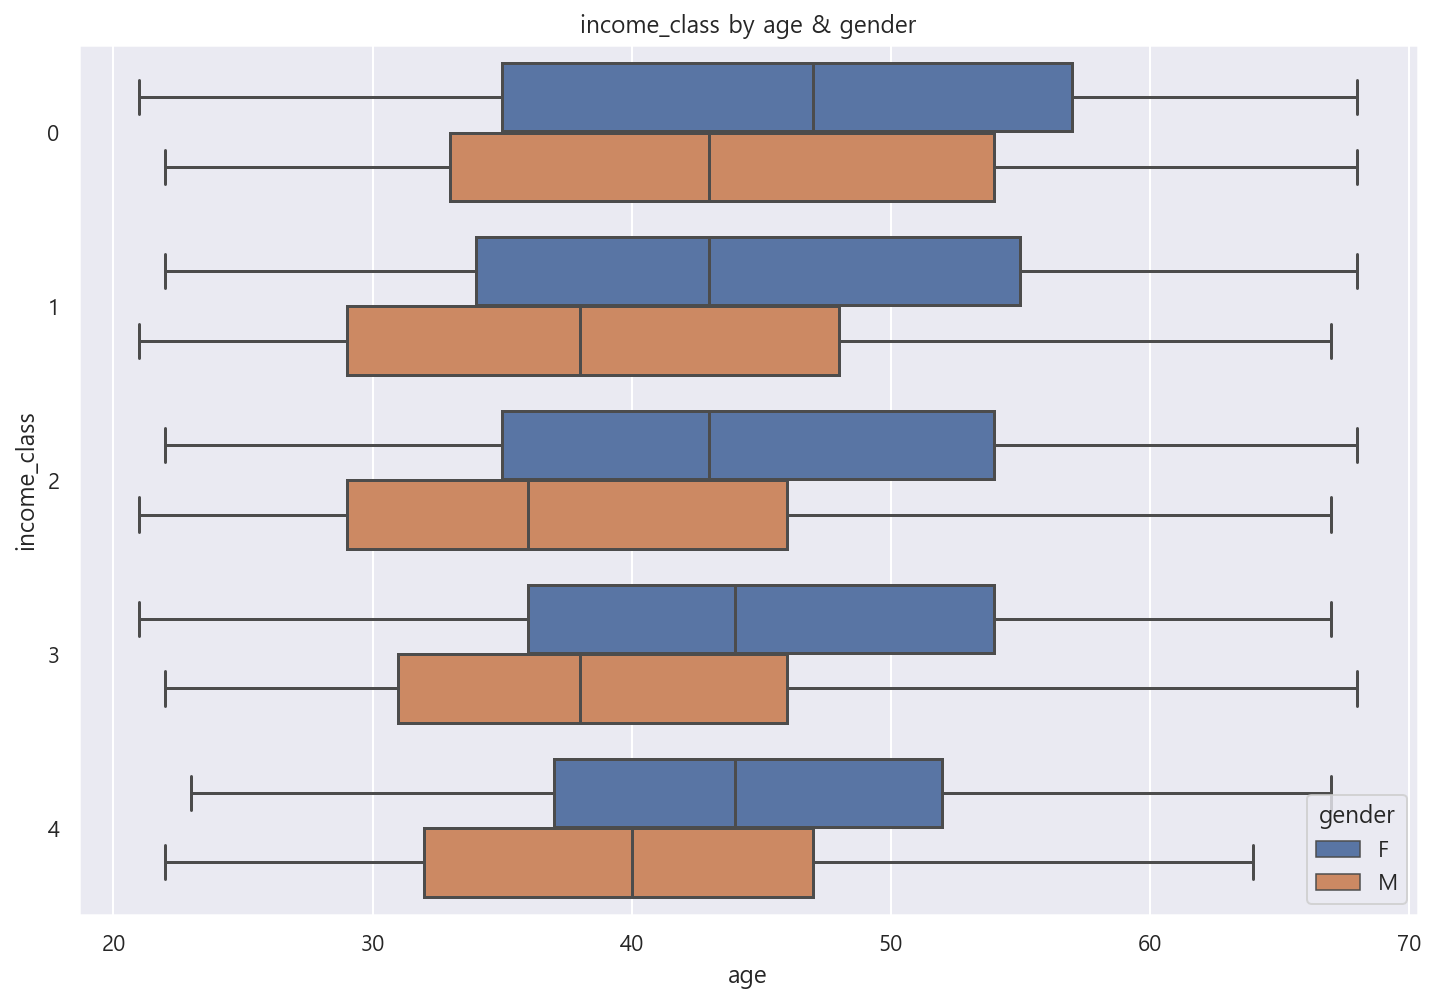

In [878]:
plt.figure(figsize=(12, 8))
plt.title('income_class by age & gender')
sns.boxplot(data=df, y='income_class', x='age', hue='gender', whis=np.inf)

- 연령대와 성별에 따른 소득 구간을 시각화 한 결과 income_class가 높을수록 남녀 모두 40대 초중반에 모여지는 것을 확인할 수 있습니다.

In [898]:
#  핸드폰은 모두 있는 것으로 기록되어 있습니다.

df.FLAG_MOBIL.value_counts()

1    26457
Name: FLAG_MOBIL, dtype: int64

<AxesSubplot:>

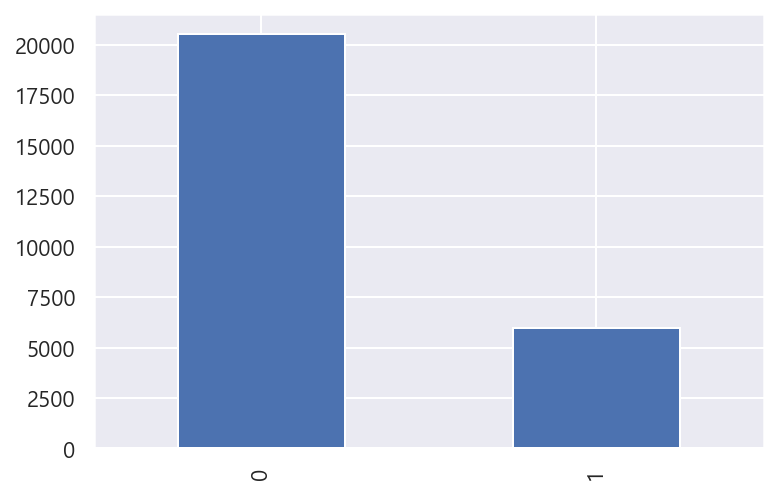

In [904]:
# 업무용 전화기는 대부분의 인원이 없습니다.

df.work_phone.value_counts().plot(kind='bar')

<AxesSubplot:>

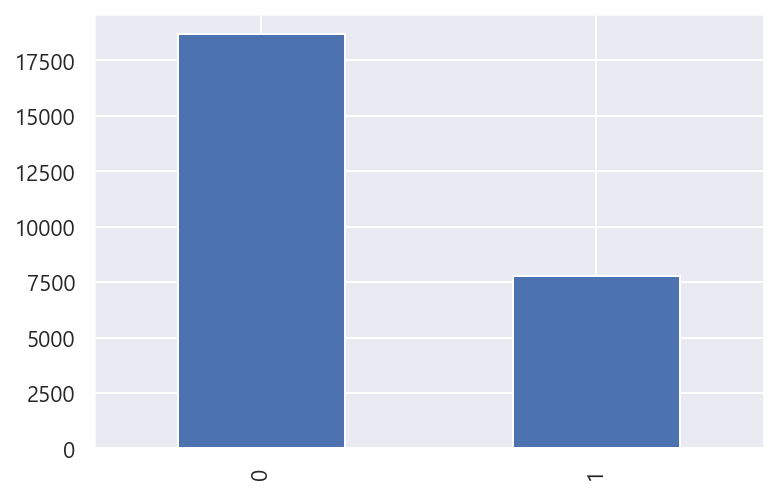

In [905]:
# 집전화 역시 대부분의 인원이 없습니다.

df.phone.value_counts().plot(kind='bar')

<AxesSubplot:>

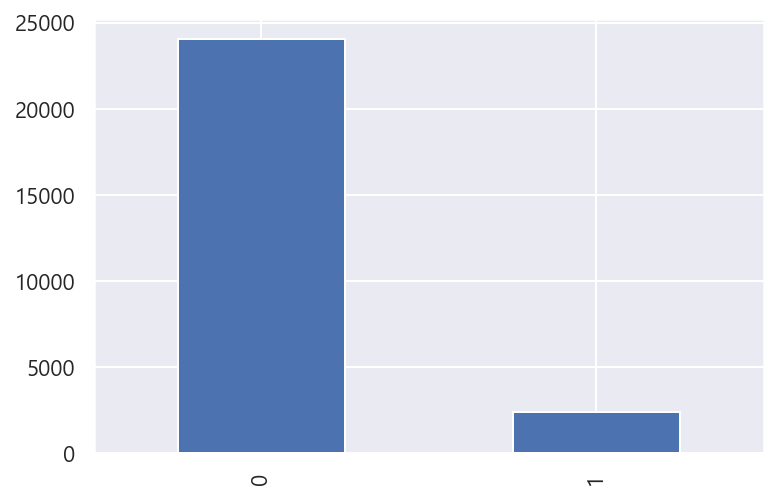

In [907]:
# 이메일도 없는 인원이 상당히 많습니다.
# 이메일이 없는 인원이 많다는게 좀 이상하긴 합니다.

df.email.value_counts().plot(kind='bar')

In [906]:
df.columns

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month', 'credit',
       'DAYS_BIRTH_clean', 'DAYS_EMPLOYED_clean', 'begin_month_clean',
       'income_class', 'age', 'newly_married'],
      dtype='object')

# 소득 유형과 직업 피처에 따른 신용도 분석
---

In [922]:
# occyp_type 에 많은 걸측치가 존재하기 때문에 무직으로 처리하고 시각화를 진행합니다.

df['occyp_type'].fillna('unemployed', inplace=True)

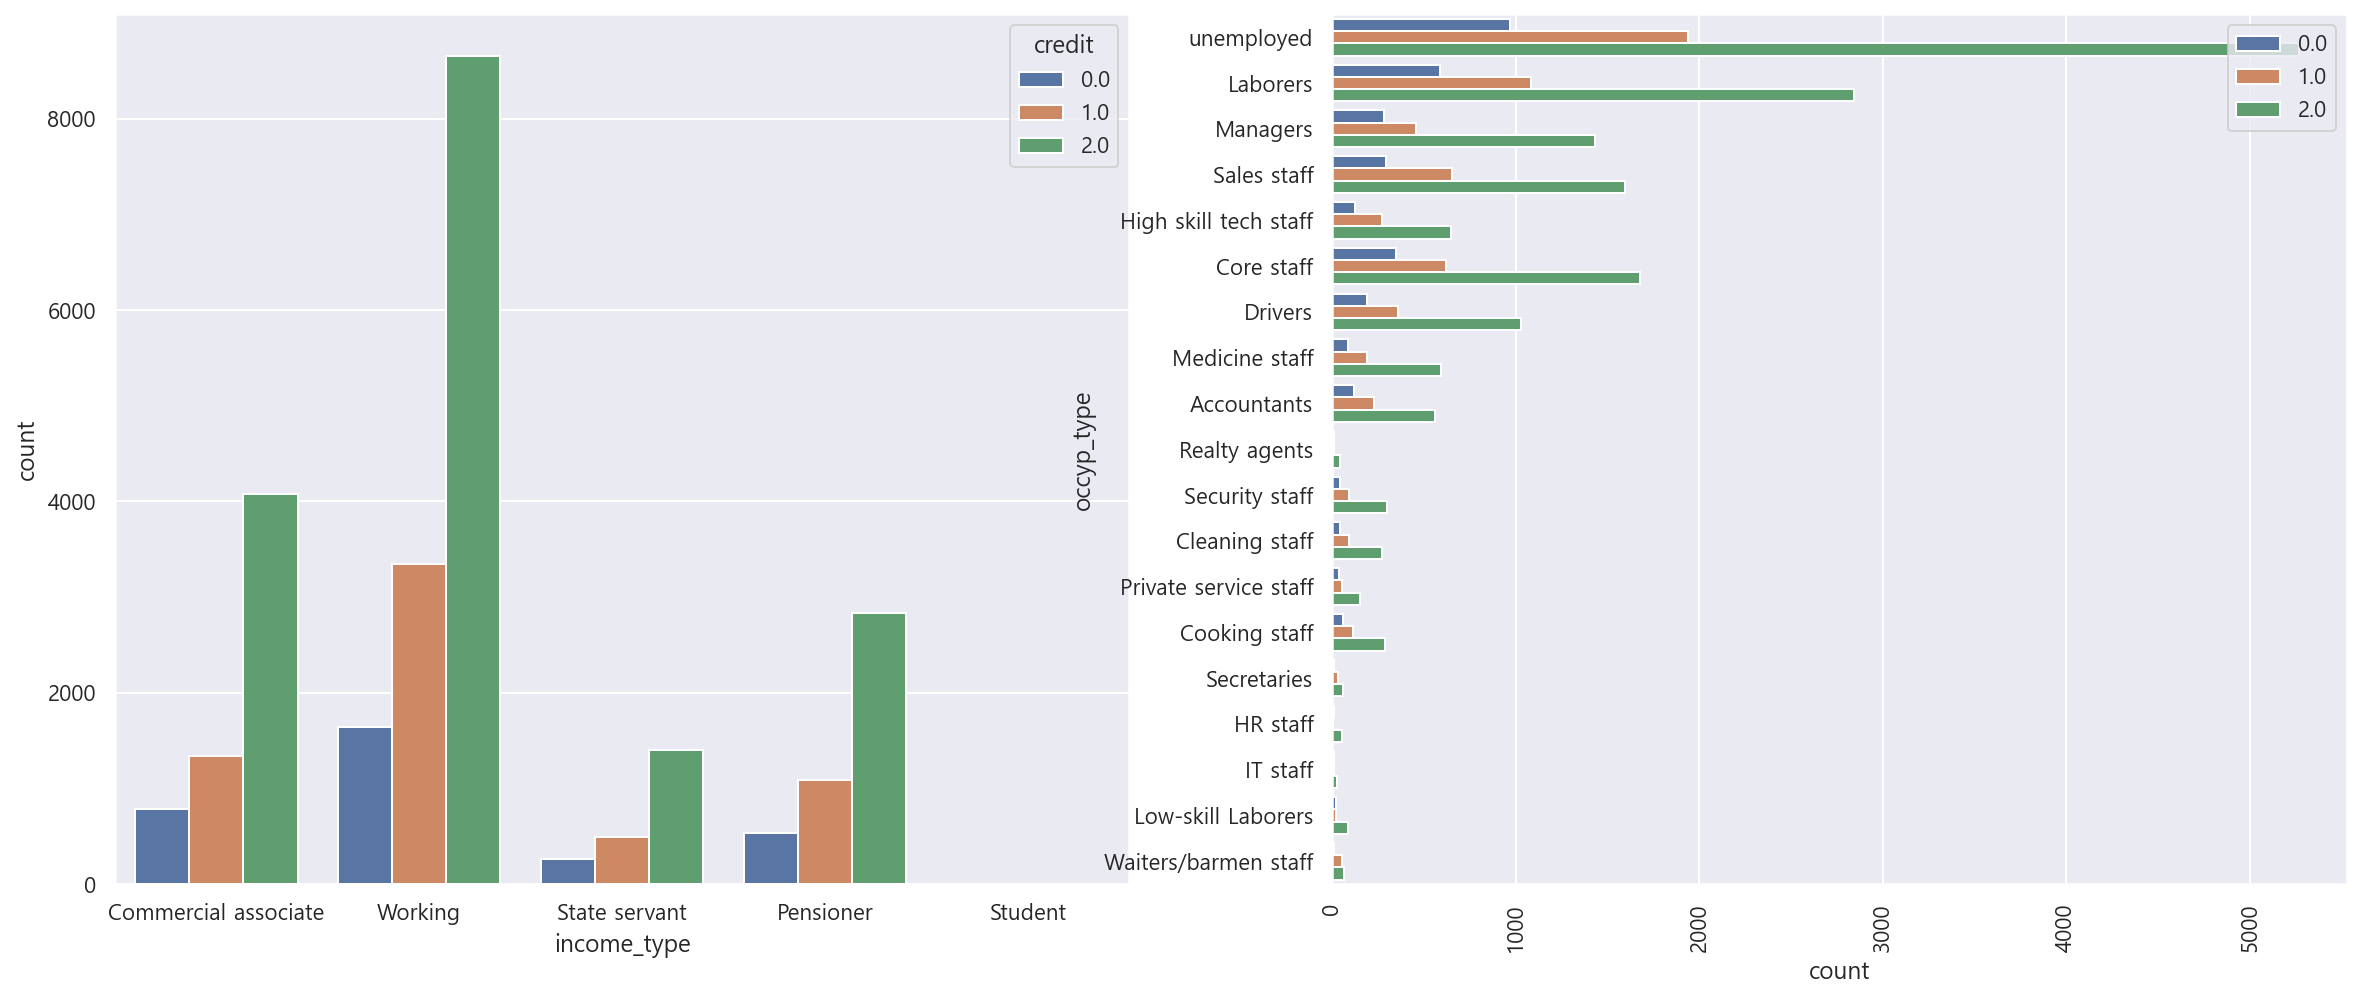

In [924]:
# 소득 유형, 직업에 따른 신용도를 분석합니다.

plt.figure(figsize=(20, 8))
plt.subplot(121)
sns.countplot(data=df, x='income_type', hue='credit')

plt.subplot(122)
sns.countplot(data=df, y='occyp_type', hue='credit')
plt.xticks(rotation=90)
plt.legend(loc=1)

- 소득 유형에 따른 신용도를 분석한 결과 Working 그룹이 가장 신용도가 낮은 인원이 많이 분포한 것을 알 수 있습니다.


- 직업에 따른 신용도를 분석한 결과 신용도가 낮은 인원이 압도적으로 많이 분포한 직업이 결측치인 unemployed입니다.


- 이번 대회의 목적은 연체 위험군에 속하는 신용도가 낮은 인원을 분류하는 것으로 해당 데이터를 단순히 제거하는 것은 위험하다는 생각이 듭니다.

In [948]:
# 앞서 결측치를 무직으로 처리한 그룹이 어떤 그룹인지 자세히 알아 볼 필요가 있습니다.

unemp = df.loc[df['occyp_type']=='unemployed']
emp = df.loc[df['occyp_type']!='unemployed']

In [949]:
unemp.columns

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month', 'credit',
       'DAYS_BIRTH_clean', 'DAYS_EMPLOYED_clean', 'begin_month_clean',
       'income_class', 'age', 'newly_married'],
      dtype='object')

<AxesSubplot:xlabel='gender', ylabel='count'>

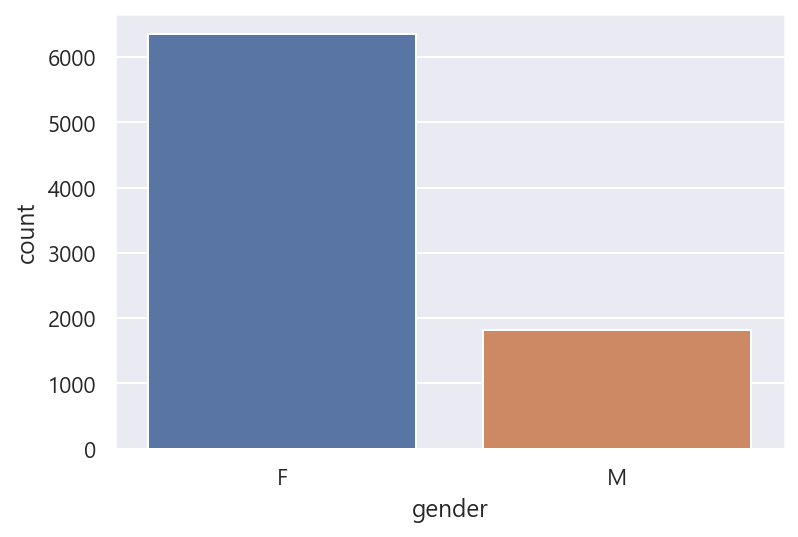

In [950]:
# 여성이 압도적으로 많은 그룹입니다.

sns.countplot(unemp.gender)

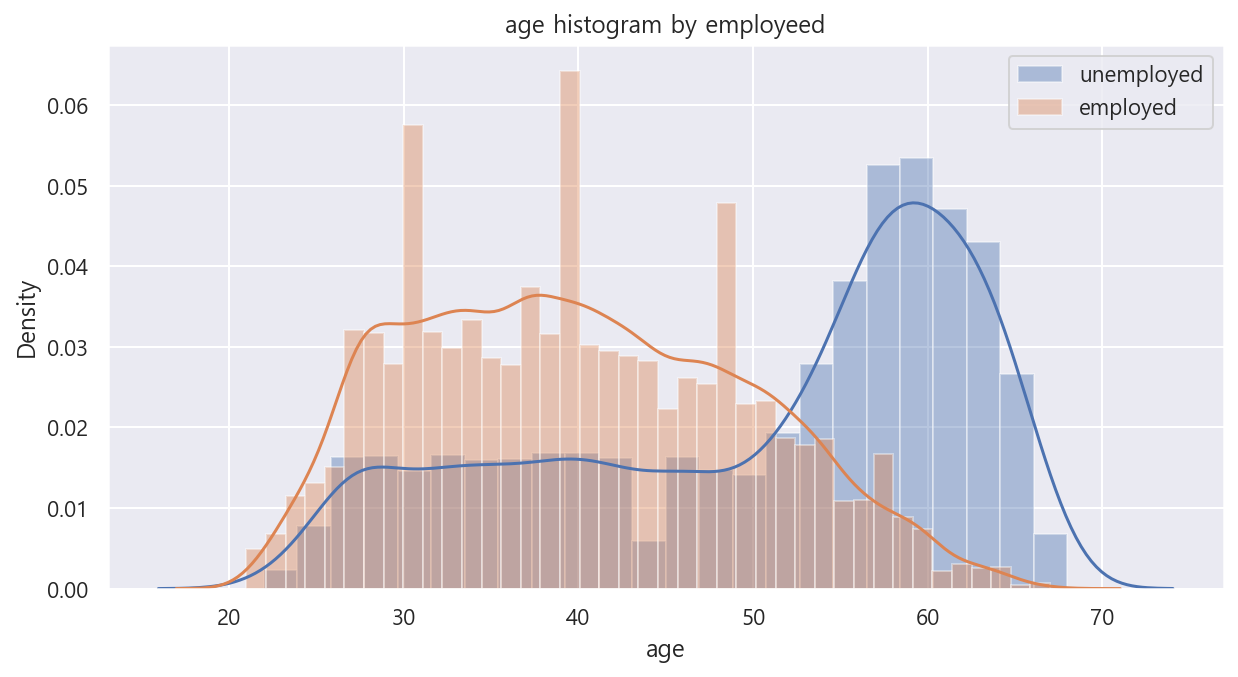

In [983]:
# 무직 그룹의 연령대를 히스토그램으로 그립니다.

plt.figure(figsize=(10, 5))
plt.title('age histogram by employeed')
sns.distplot(unemp.age, label='unemployed')
sns.distplot(emp.age, label='employed')
plt.legend()

* 무직 그룹의 연령을 히스토그램으로 시각화 한 결과 대부분의 인원이 60대의 노인으로 은퇴 그룹으로 보여집니다.


* 해당 그룹을 제외하고는 소득수준을 따져 프리랜서 혹은 무직으로 처리하는 것이 좋다고 생각합니다.

<AxesSubplot:>

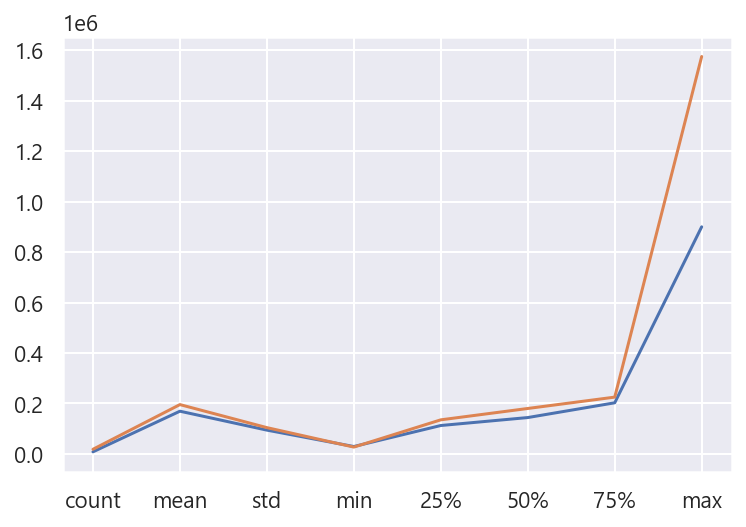

In [970]:
# 무직 그룹과 총 수입 통계량 비교

unemp.income_total.describe().plot()
emp.income_total.describe().plot()

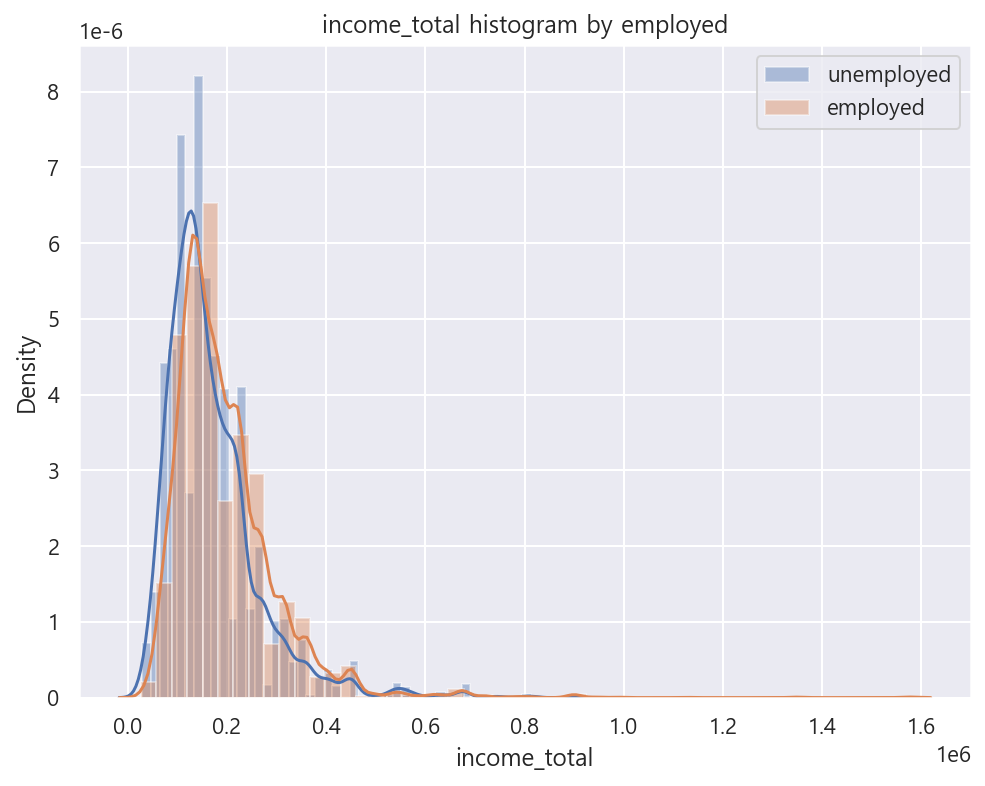

In [985]:
# 무직 그룹과 총 수입 분포 비교

plt.figure(figsize=(8, 6))
plt.title('income_total histogram by employed')
sns.distplot(unemp.income_total, label='unemployed')
sns.distplot(emp.income_total, label='employed')
plt.legend()

- 무직 그룹과 그 외의 그룹의 income_total을 비교한 결과 큰 차이가 없습니다. 따라서 해당 그룹은 단순한 백수가 아닌 프리랜서로 보는것이 좋다고 생각합니다.

In [986]:
unemp.columns

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month', 'credit',
       'DAYS_BIRTH_clean', 'DAYS_EMPLOYED_clean', 'begin_month_clean',
       'income_class', 'age', 'newly_married'],
      dtype='object')

In [988]:
# 무직 그룹의 신혼 여부는 No에 해당하는 인원이 대부분입니다.

unemp.newly_married.value_counts()

No     7561
Yes     610
Name: newly_married, dtype: int64

In [990]:
# 가족 구성원 역시 2명에 해당하는 인원이 상당히 많습니다.(노부부로 추정)

unemp.family_size.value_counts()

2.0    4870
1.0    1979
3.0     876
4.0     379
5.0      62
6.0       5
Name: family_size, dtype: int64

In [998]:
unemp.income_type.value_counts()

Pensioner               4440
Working                 2312
Commercial associate    1026
State servant            392
Student                    1
Name: income_type, dtype: int64

<AxesSubplot:xlabel='income_type', ylabel='count'>

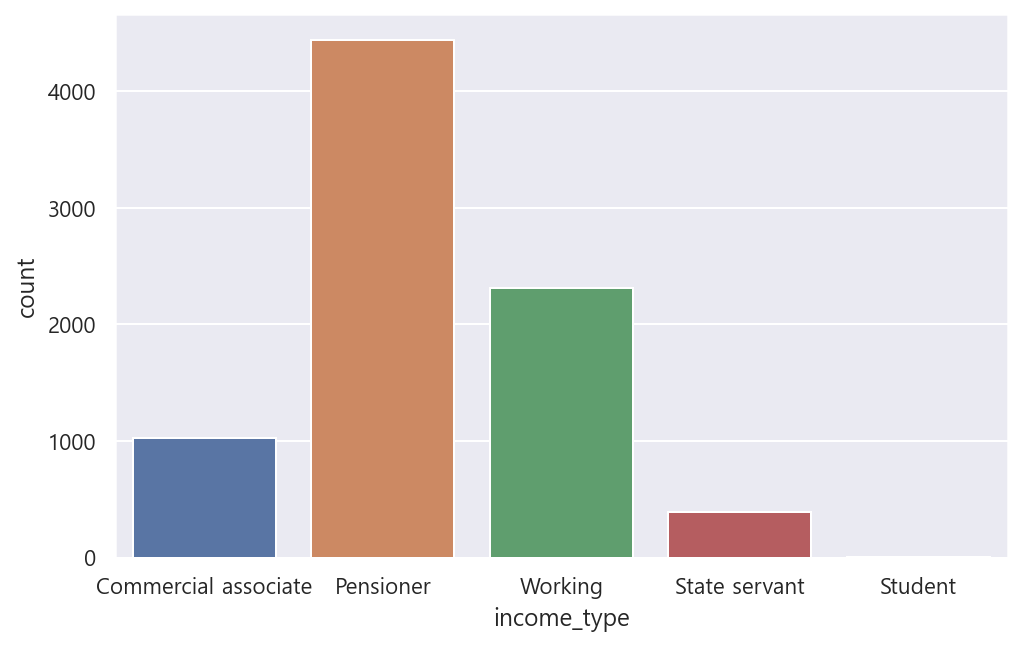

In [1002]:
plt.figure(figsize=(8, 5))
sns.countplot(unemp.income_type)

- student가 1명 대부분의 인원은 Penisioner(연금수령자)로 보여집니다. 따라서 해당 그룹의 직업은 연금수령자로 결측치를 처리하고 나머지 인원은 무직보다는 적절히 직업 유형에 맞게끔 결측치를 처리하는 것이 좋다고 판단됩니다.

# 인코딩
---

In [1004]:
# 레이블 인코딩

df['gender'] = df['gender'].astype('category').cat.codes
df['car'] = df['car'].astype('category').cat.codes
df['reality'] = df['reality'].astype('category').cat.codes
df['FLAG_MOBIL'] = df['FLAG_MOBIL'].astype('category').cat.codes
df['work_phone'] = df['work_phone'].astype('category').cat.codes
df['phone'] = df['phone'].astype('category').cat.codes
df['email'] = df['email'].astype('category').cat.codes
#df['edu_type'] = df['edu_type'].astype('category').cat.codes

- Binary Data는 레이블 인코딩을 진행합니다.


- 추가적으로 edu_type의 경우 순서가 있다고 판단하여 레이블 인코딩을 진행합니다.ㅡ

In [1007]:
df.columns

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month', 'credit',
       'DAYS_BIRTH_clean', 'DAYS_EMPLOYED_clean', 'begin_month_clean',
       'income_class', 'age', 'newly_married'],
      dtype='object')

In [1009]:
# 원핫인코딩

df = pd.get_dummies(data=df, columns=['income_type', 'family_type', 'house_type', 'occyp_type'])

# corr matrix
---

<AxesSubplot:>

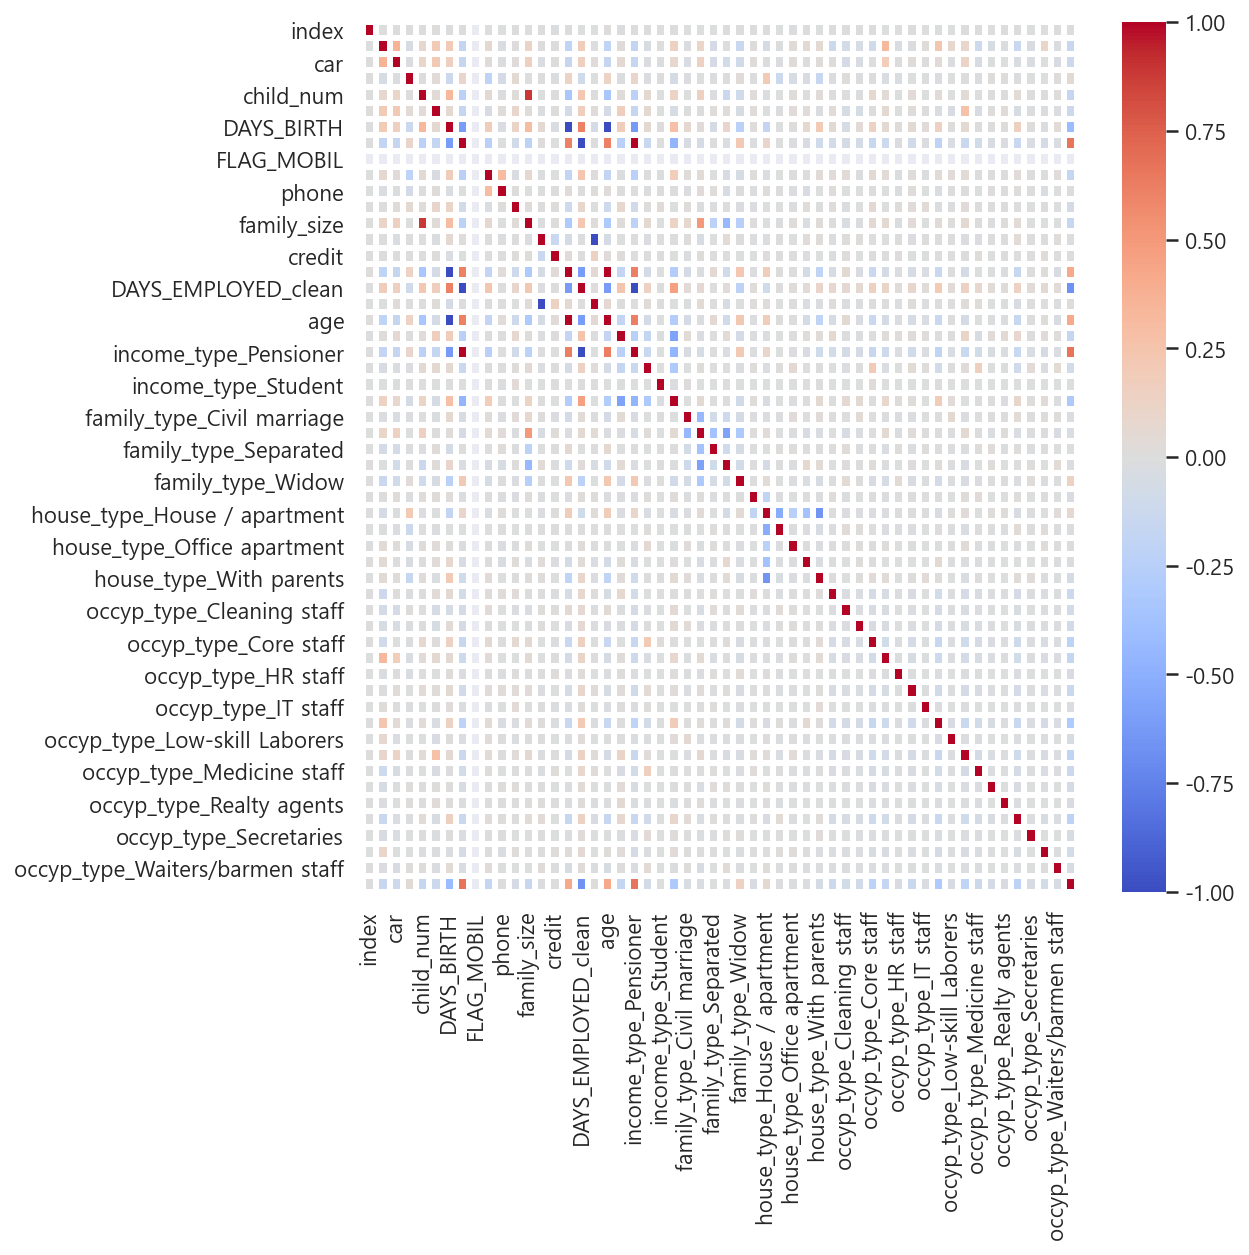

In [1012]:
# 현재까지 추가한 피쳐들을 바탕으로 상관관계 히트맵 생성

plt.figure(figsize=(8, 8))
corr = df.corr()
sns.heatmap(corr, linewidths=2.5, cmap="coolwarm")

In [1026]:
# credit에 관한 상관관계만 확인하기 위해 바플랏 추가 생성

corr_table = df.corr()[['credit']].drop('credit').sort_values(by='credit')
corr_table.head(5)

,credit
begin_month,-0.147477
DAYS_BIRTH,-0.025187
family_type_Civil marriage,-0.018826
house_type_Rented apartment,-0.017425
occyp_type_Laborers,-0.012343


<AxesSubplot:xlabel='credit'>

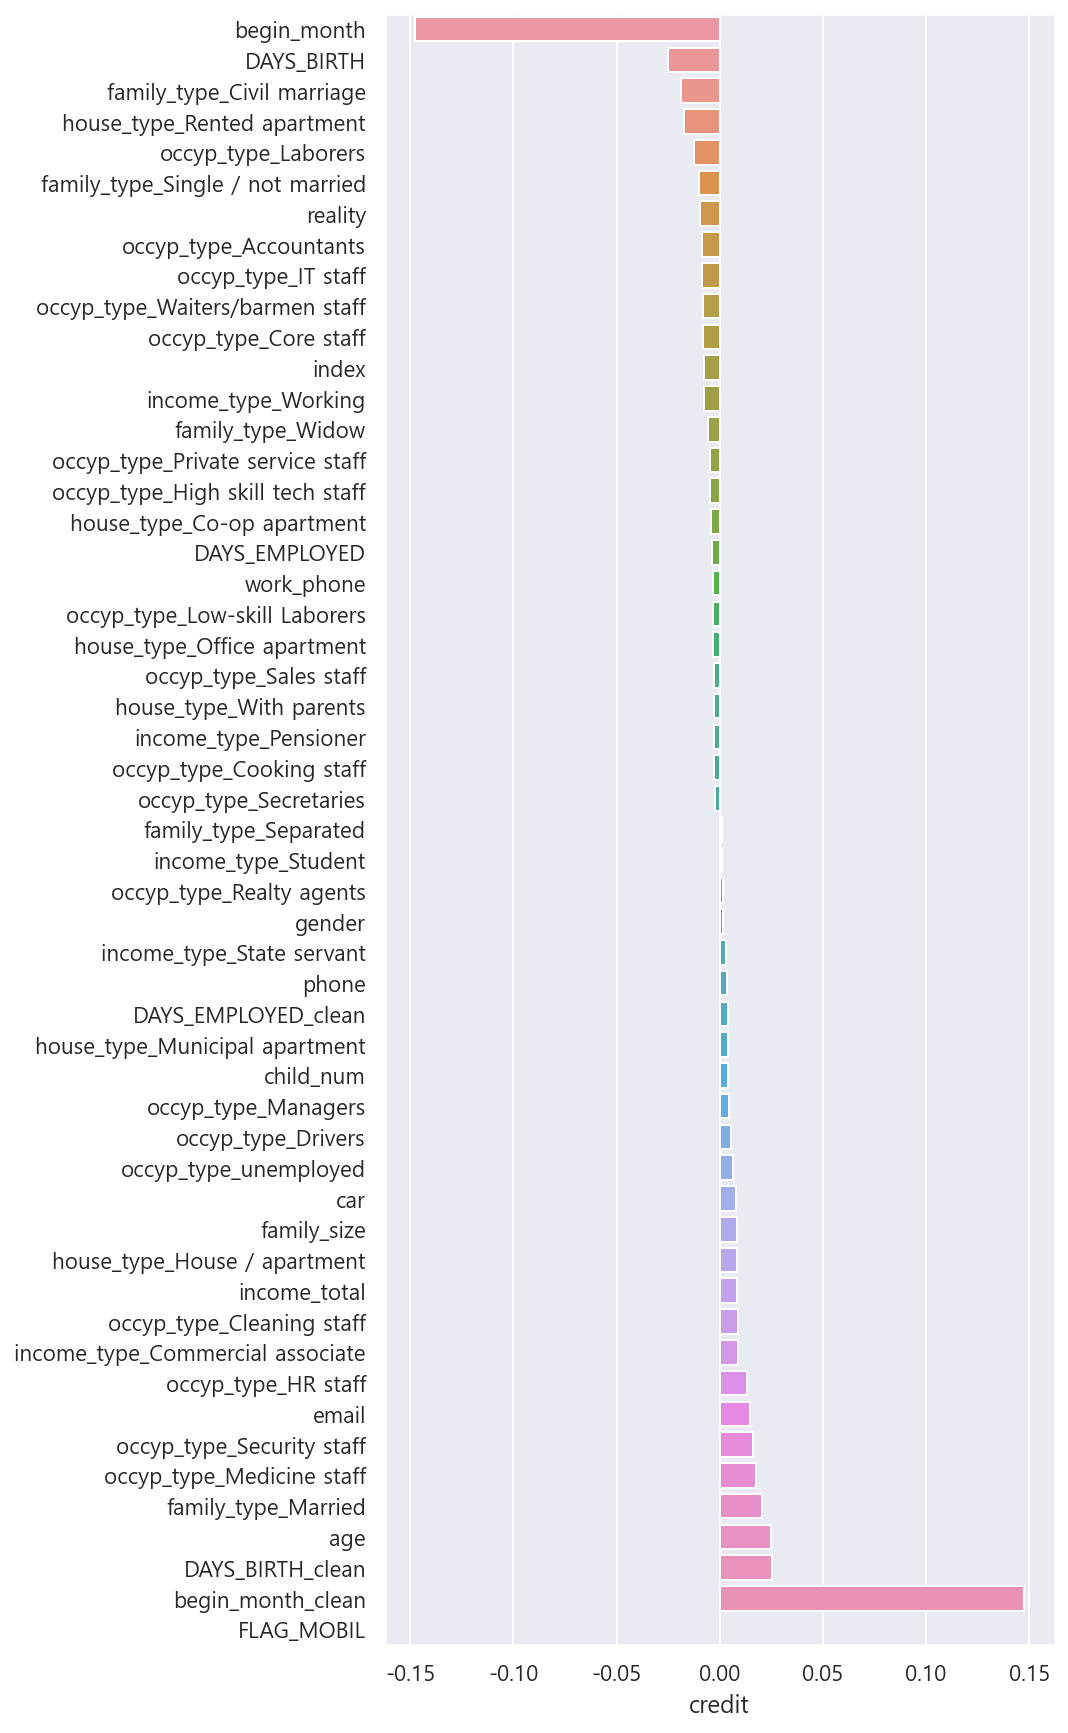

In [1031]:
plt.figure(figsize=(6, 15))

sns.barplot(data=corr_table, y=corr_table.index, x='credit')

In [ ]:
# 2021-04-26 추가 부분

# 중복값 처리
----

In [23]:
df.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [49]:
# index, begin_month, credit을 제외하고 중복되는 데이터 17711개

df.duplicated(df.columns[1:-2]).sum()

17698

In [61]:
# index, begin_month, credit을 제외하고 중복되는 데이터 17711개

df.duplicated(df.columns[1:]).sum()

1634

In [50]:
dup_df = df[df.duplicated(df.columns[1:-2])]
dup_df.head(3)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
192,192,F,N,Y,0,135000.0,Working,Higher education,Married,House / apartment,-13299,-1628,1,0,0,0,Laborers,2.0,-14.0,2.0
210,210,F,Y,Y,1,225000.0,Working,Higher education,Separated,House / apartment,-14816,-1672,1,0,0,0,Core staff,2.0,0.0,1.0
319,319,F,N,N,1,225000.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-12640,-399,1,0,0,0,Accountants,3.0,-21.0,2.0


In [57]:
dup_df[dup_df.duplicated(dup_df.columns[1:-2])]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
536,536,F,N,Y,0,135000.0,Working,Higher education,Married,House / apartment,-13299,-1628,1,0,0,0,Laborers,2.0,-5.0,0.0
717,717,F,N,Y,0,297000.0,Commercial associate,Secondary / secondary special,Single / not married,Rented apartment,-15519,-3234,1,0,0,0,Laborers,1.0,-36.0,0.0
753,753,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-21497,365243,1,0,0,0,NaN,1.0,-9.0,2.0
843,843,M,N,N,2,180000.0,Working,Secondary / secondary special,Married,House / apartment,-9930,-2324,1,0,0,1,Laborers,4.0,-56.0,2.0
848,848,M,Y,N,0,427500.0,Working,Higher education,Married,House / apartment,-16691,-1565,1,1,0,0,Managers,2.0,-44.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26446,26446,F,N,Y,0,135000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-16300,-9698,1,0,0,1,Managers,2.0,-41.0,2.0
26447,26447,M,N,Y,2,99000.0,Working,Secondary / secondary special,Married,House / apartment,-14226,-1026,1,1,1,0,Laborers,4.0,-43.0,2.0
26449,26449,F,N,N,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-10498,-2418,1,1,1,0,NaN,2.0,-2.0,1.0
26451,26451,F,N,Y,0,202500.0,Working,Higher education,Married,House / apartment,-12831,-803,1,1,1,0,Accountants,2.0,-44.0,1.0


In [60]:
dup_df[dup_df.duplicated(dup_df.columns[1:])]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
2183,2183,F,N,N,0,270000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-11734,-2164,1,0,1,1,High skill tech staff,1.0,-25.0,2.0
2829,2829,F,N,Y,0,247500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19366,-746,1,0,0,0,NaN,2.0,-57.0,2.0
2912,2912,F,N,Y,1,157500.0,State servant,Secondary / secondary special,Single / not married,House / apartment,-12676,-1350,1,0,0,0,Waiters/barmen staff,2.0,-23.0,1.0
3001,3001,M,N,N,1,225000.0,Commercial associate,Secondary / secondary special,Married,With parents,-17868,-1912,1,0,0,0,Drivers,3.0,-21.0,0.0
3261,3261,F,N,N,0,72000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-18799,-1466,1,1,0,0,Cleaning staff,1.0,-2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26362,26362,F,N,Y,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,-11905,-2470,1,0,1,1,Cooking staff,2.0,-46.0,2.0
26374,26374,F,Y,N,0,112500.0,Working,Secondary / secondary special,Married,Municipal apartment,-17372,-978,1,0,1,0,Sales staff,2.0,-15.0,1.0
26393,26393,M,Y,Y,0,247500.0,Working,Secondary / secondary special,Married,House / apartment,-14122,-3383,1,0,0,0,Managers,2.0,-31.0,2.0
26428,26428,F,Y,Y,2,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-12745,-525,1,0,0,1,Core staff,4.0,-23.0,1.0


In [52]:
dup_dup_df = dup_df[dup_df.duplicated(dup_df.columns[1:-2])]

idx=[]

for i in dup_dup_df.index:
    idx.append(i)
print('done')

done


In [58]:
not_dup_idx = []

for i in dup_df.index:
    if i not in idx:
        not_dup_idx.append(i)

In [59]:
len(not_dup_idx)

5510